# Naive Bayes

## Pros

- Highly scalable
- Easy to implement
- Doesn't require a lot of data
- Easily handles missing data and noise

## Cons

- Bad estimators of class probabilities
- Assumptions made often do not hold
- Simplistic

## About the model

Naive Bayes is a technique used for classification that has been studied since the 1950s. It was first used for text categorization, predicting wether text is of one type or another, spam or not spam, English or German, for instance. It is still used to this day as a benchmark for this class of tasks. Of course, it can be used for any classification task.

The name Naive Bayes comes from the fact that the model is based on Bayes' theorem with strong, or naive, independence assumption between the features. If you don't know what any of this means, don't worry, this will become clearer later on.

This is one of the first papers introducing Bayesian techniques, including Naive Bayes, if you're curious: https://www.cs.utexas.edu/~jsinapov/teaching/cs378/readings/W2/Minsky60steps.pdf

Naive Bayes is highly popular for many reasons. Though it is sometimes simplistic, it has shown to perform well in real-world applications like document classification or spam filtering. It can be a useful lower bound on performance when developing models. It is highly scalable, as it can be trained fast, and can classify datapoints quickly.

## Practical Example

Let's take the following example. We are given the following training data:

| Weight | Height | Gender |
|:------:|:------:|:------:|
|   72   |   180  |  female  |
|   77   |   186  |  male  |
|   74   |   181  |  male  |
|   81   |   182  |  female  |
|   77   |   179  |  male  |
|   78   |   176  |  male  |
|   82   |   184  |  male  |
|   70   |   162  | female |
|   61   |   159  | female |
|   66   |   170  | female |
|   65   |   166  | male |
|   66   |   156  | female |
|   63   |   163  | male |
|   60   |   160  | female |

In [81]:
import numpy as np

X = np.array([[72,180], [77,186], [74,181], [81,182], [77,179], [78,176], [82,184], [70,162], [61,159], [66,170], [65,166], [66,156], [63,163], [60,160]])  
y = np.array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]) # where male is 0, and female is 1

And we are asked to predict whether someone who is 180cm and 60kg is male or female using a Naive Bayes classifier. To understand how this works, we must take a look at Bayes' Theorem:

$$P(Class \mid Features) = \frac{P(Features \mid Class)P(Class)}{P(Features)}$$

The theorem gives us a way to calculate the probability a class (male or female) given some features (height and weight). Therefore, to make a prediction, we will need to calculate the probability for both classes and pick the class with the highest one. For our use case, Bayes' Theorem takes the following form:

$$P(Gender \mid Height=180, Weight = 60) = \frac{P(Gender) \space P(Height=180, Weight = 60 \mid Gender)}{P(Height=180, Weight = 60)}$$

Which can be read in statistical term as the following:

$$Posterior = \frac{Prior \times Likelihood}{Evidence}$$

To simplify the formula, we can ignore the evidence as it is independent of the class. We can also make use of the strong assumption of independence which is why these classifiers are called "Naïve". What does this mean in practice? It means that our formula now looks like this:

$$P(Gender \mid Height=180, Weight = 60) = P(Gender) \space P(Height=180 \mid Gender) \space P(Weight = 60 \mid Gender)$$

We have simplified the likelihood by assuming that gender and height are independent of one another. It means that now, to calculate the posterior, we need to do the calculate the following probabilities:

- $P(Gender)$

Also referred to as the prior, it represents the probability that a person is of any gender. You can understand the prior as being the chance that an event is of a certain class "prior" to knowing anything else about that data point. In our case, it means that regardless of their height and weight, there is a certain probability that someone might be male or female.

In [96]:
classes, counts = np.unique(y, return_counts=True)
priors = counts / np.sum(counts)

print("P(Female) = {0}".format(priors[0]))
print("P(Male) = {0}".format(priors[1]))

P(Female) = 0.5
P(Male) = 0.5


- $P(Height=180 \mid Gender)$

It represents the probability that a male, or a female, is 180cm. You can read it as "If we know that someone is 180cm tall, how likely is it that they are male/female?".

In order to calculate that, we'll assume that height follows a normal distribution for males and females. We can fit these distributions using the data at our disposal.

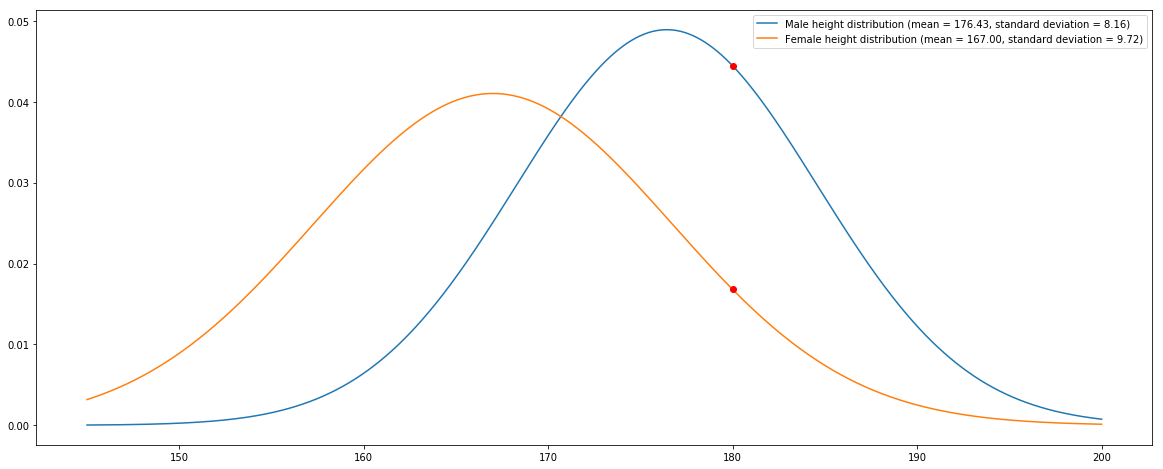

In [97]:
from matplotlib import pyplot as plt
import scipy.stats as ss

height = 180 ; weight = 60

male_heights = X[y == 0][:,1] ; female_heights = X[y ==1 ][:,1]

male_mean, male_std_dev = np.mean(male_heights), np.std(male_heights)
female_mean, female_std_dev = np.mean(female_heights), np.std(female_heights)

heights = np.linspace(145,200,1000)

plt.figure(figsize=(20,8))
mh, = plt.plot(heights, [ss.norm(male_mean, male_std_dev).pdf(x) for x in heights])
plt.plot(height, ss.norm(male_mean, male_std_dev).pdf(height), 'ro')

fh, = plt.plot(heights, [ss.norm(female_mean, female_std_dev).pdf(x) for x in heights])
plt.plot(height, ss.norm(female_mean, female_std_dev).pdf(height), 'ro')

plt.legend([mh, fh],
           ['Male height distribution (mean = {0:.2f}, standard deviation = {1:.2f})'.format(male_mean, male_std_dev),
            'Female height distribution (mean = {0:.2f}, standard deviation = {1:.2f})'.format(female_mean, female_std_dev)])
plt.show()

And thanks to this, we can calculate the probabilities we were looking for.

In [98]:
prob_height_male = ss.norm(male_mean, male_std_dev).pdf(height)
print("P(Height = {h} | Male) = {p}".format(h=height,p=prob_height_male))

prob_height_female = ss.norm(female_mean, female_std_dev).pdf(height)
print("P(Height = {h} | Female) = {p}".format(h=height,p=prob_height_female))

P(Height = 180 | Male) = 0.04443941327035024
P(Height = 180 | Female) = 0.01678749913989593


- $P(Weight=60 \mid Gender)$

As for the previous example, this represents the probability that a male or female weighs 60kg. This can be read as "If someone is 60kg, how likely is it that they are male/female?".

We will take the same assumption that weight follows a normal distribution for both gender. And again, we can fit these distributions using our data.

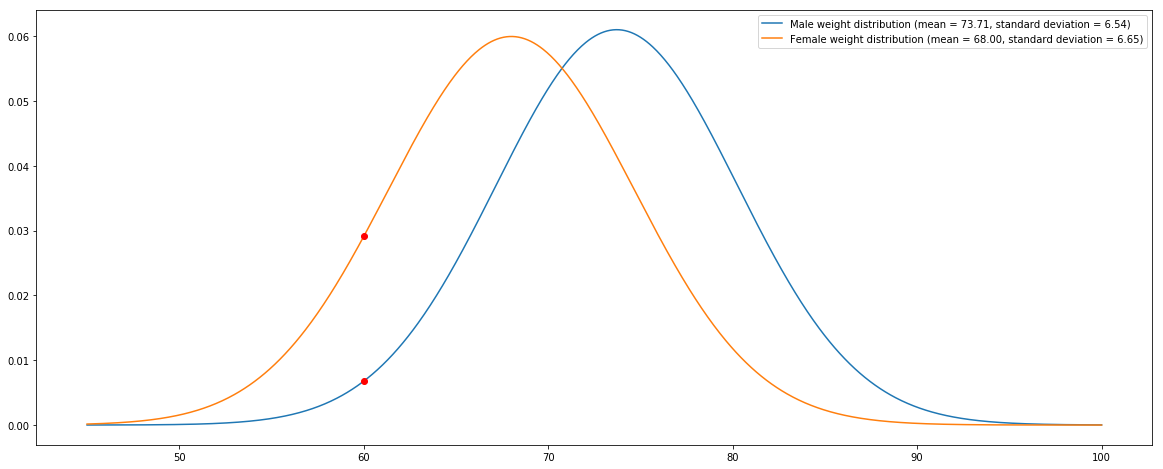

In [99]:
male_weights = X[y == 0][:,0] ; female_weights = X[y ==1 ][:,0]

male_mean, male_std_dev = np.mean(male_weights), np.std(male_weights)
female_mean, female_std_dev = np.mean(female_weights), np.std(female_weights)

weights = np.linspace(45,100,1000)

plt.figure(figsize=(20,8))
mw, = plt.plot(weights, [ss.norm(male_mean, male_std_dev).pdf(x) for x in weights])
plt.plot(weight, ss.norm(male_mean, male_std_dev).pdf(weight), 'ro')

fw, = plt.plot(weights, [ss.norm(female_mean, female_std_dev).pdf(x) for x in weights])
plt.plot(weight, ss.norm(female_mean, female_std_dev).pdf(weight), 'ro')

plt.legend([mh, fh],
           ['Male weight distribution (mean = {0:.2f}, standard deviation = {1:.2f})'.format(male_mean, male_std_dev),
            'Female weight distribution (mean = {0:.2f}, standard deviation = {1:.2f})'.format(female_mean, female_std_dev)])
plt.show()

And thanks to this, we can calculate the probabilities we were looking for.

In [100]:
prob_weight_male = ss.norm(male_mean, male_std_dev).pdf(weight)
print("P(Weight = {w} | Male) = {p}".format(w=weight,p=prob_weight_male))

prob_weight_female = ss.norm(female_mean, female_std_dev).pdf(weight)
print("P(Weight = {w} | Female) = {p}".format(w=weight,p=prob_weight_female))

P(Weight = 60 | Male) = 0.00676904890040124
P(Weight = 60 | Female) = 0.029104855804889185


Now that we know this, we can calculate the joint probability. Thanks to this, we can already predict which class is more likely. Indeed, since the evidence is independent of the class, the joint probability is directly proportional to the final probability.

In [153]:
joint_prob_female = priors[1] * prob_height_female * prob_weight_female
print("P(Female | Height={h}, Weight = {w}) = {p}".format(h=height, w=weight, p=joint_prob_female))

joint_prob_male = priors[0] * prob_height_male * prob_weight_male
print("P(Male | Height={h}, Weight = {w}) = {p}".format(h=height, w=weight, p=joint_prob_male))

P(Female | Height=180, Weight = 60) = 0.00024429887089568613
P(Male | Height=180, Weight = 60) = 0.0001504062807660703


Since the joint probability for female is higher, we will classify this specific individual as female. Now, if we want to calculate the exact estimate of the probabilities, we need to calculate the evidence.

- $P(Height=180, Weight = 60)$

It represents the probability that any individual is 180cm and also 60kg. This can be read as "How likely is it that anyone is 180cm and 60kg?".

In [154]:
weights = X[:,0] ; heights = X[:,1]

height_mean, height_std_dev = np.mean(heights), np.std(heights)
weight_mean, weight_std_dev = np.mean(weights), np.std(weights)

height_dist = ss.norm(height_mean, height_std_dev)
weight_dist = ss.norm(weight_mean, weight_std_dev)

prob_features = height_dist.pdf(height) * weight_dist.pdf(weight)
print("P(Height={h}, Weight = {w}) = P(Height={h}) * P(Weight = {w}) = {p}".format(h=height, w=weight, p=prob_features))

P(Height=180, Weight = 60) = P(Height=180) * P(Weight = 60) = 0.0004999684582989314


Which gives us the final estimates for the probabilities where the female probability is indeed still bigger:

In [155]:
print("P(Female | Height={h}, Weight = {w}) = {p}".format(h=height, w=weight, p=joint_prob_female/prob_features))
print("P(Female | Height={h}, Weight = {w}) = {p}".format(h=height, w=weight, p=joint_prob_male/prob_features))

P(Female | Height=180, Weight = 60) = 0.48862856614370603
P(Female | Height=180, Weight = 60) = 0.30083153900909143


# Building a classifier from scratch

Now that we have gone through a practical example, we will explain the different components that you need to implement in order to build a Naive Bayes classifier from scratch.

## Making predictions

As we have shown in the example, Naive Bayes classifiers make use of probabilities in order to make predictions. Given a certain class, it looks at how likely the features are to occur, and pick the class that shows the highest probability.

There are 3 types of probabilities:

- The prior, which represents how likely each class is to occur
- The evidence, which represents how likely each feature is to occur
- The likelihood, which represents how likely each feature is to occur given a class

Therefore, our model will need to learn and store parameters that will allow it to calculate these probabilities. That way, it can make predictions by looking at which class has the highest joint probability.

In [203]:
class NBClassifier(object):

    def predict(self, X, y=None):
        """Predict the class that has the highest joint probability"""

        joint_probas = self._predict_joint_proba(X)
        indices = np.argmax(joint_probas, axis=1)

        return self.classes_[indices]

We can calculate the joint probability of a sample with each class by multiplying the prior with the likelihood.

In [157]:
    def _predict_joint_proba(self, X, y=None):
        """Predict the joint probability for each class"""

        return np.array([[self._get_prior(c) * self._get_likelihood(sample, c) for c in self.classes_]
                         for sample in X])

And if we are interested in the actual estimates of the probabilities, we will need to divide these joint probabilities by the evidence.

In [158]:
    def predict_proba(self, X, y=None):
        """Predict the probability of each class to occur"""

        joint_probas = self._predict_joint_proba(X, y)
        evidence = np.array([[self._get_evidence(x)] for x in X])

        return joint_probas / evidence

Where `X` is the input made up of several samples, `self.classes_` are the classes of this problem, and `_get_prior(c)`, `_get_likelihood(X, c)`, and `_get_evidence(X)` are functions returning the proper probabilities given a sample and/or the class.

## Training the classifier

Now, of course, the code that we just wrote will only work if we can compute these probabilities. To do this, we need to train the classifier on training data. This will be carried out by the `fit()` function, which takes in data points `X` and their corresponding class `y`.

In [159]:
    def fit(self, X, y):

        self.priors_ = self._fit_prior(y)
        self.feature_probabilities_ = self._fit_evidence(X)
        self.feature_likelihoods_ = self._fit_likelihood(X, y)

        return self

In order to fit the priors, we need to keep track of how many data points `X` we encounter, and how frequently each class `y` appears. This can be done with the following code which stores these parameters in a dictionary.

In [160]:
    def _fit_prior(self, y):

        self.classes_, counts = np.unique(y, return_counts=True)
        total_count = np.sum(counts)

        return {c: dict(count=counts[i], total_count=total_count) for i, c in enumerate(self.classes_)}

The reason we keep track of the class count and total count is that it makes it much easier to update the model if new data points come in. Indeed, now we can easily update the priors if new data comes in.

In [161]:
    def _update_prior(self, y):

        self.classes_, counts = np.unique(y, return_counts=True)
        total_count = np.sum(counts)

        for i, c in enumerate(self.classes_):

            self.priors_[c]["count"] += counts[i]
            self.priors_[c]["total_count"] += total_count

        return self.priors_

Now that we know how to fit and update the priors, we can make use of the information we stored to calculate them given a class.

In [162]:
    def _get_prior(self, c):

        count = self.priors_[c]["count"]
        total_count = self.priors_[c]["total_count"]

        return count / total_count

Calculating the likelihood and the evidence is done differently based on which type of Naive Bayes classifier we are dealing with. There are typically 3 main ones, which all depend on the distribution that the features are assumed to follow.

### Gaussian Naive Bayes

The Gaussian Naive Bayes classifier deals with continuous features and it assumes that they follow a normal distribution. Since a normal distribution is parameterized by a mean (location) and standard deviation (scale), we can compute the relative likelihood of a data point using the probability density function.

In [204]:
class GaussianNB(NBClassifier):

    def _pdf(self, x, mean, std):

        eps = 1e-4 # Added in denominator to prevent division by zero
        num = np.exp(-((x - mean)**2) / (2 * std**2 + eps))
        den = np.sqrt(2.0 * np.pi * std**2 + eps)

        return num / den

This means that to fit the evidence, we need to keep track of the mean, standard deviation, and the amount of the data points for each feature.

In [190]:
    def _fit_evidence(self, X):

        evidence = []

        for feature in X.transpose():

            m = np.mean(feature)
            n = len(feature)
            s = np.std(feature, ddof=1)

            evidence.append(dict(mean=m, std=s, n=n))

        return np.array(evidence)

And to update it, we can make use of the incremental mean and standard deviation formulae.

In [191]:
    def _update_evidence(self, X):

        for i, feature in enumerate(X.transpose()):

            old_n = self.evidence_[c][i]["n"]
            n = old_n + len(feature)

            old_m = self.evidence_[c][i]["mean"]
            m = (old_m * old_n + np.mean(feature) * n) / (old_n + n)

            old_std = self.evidence_[c][i]["std"]
            s = np.sqrt((old_n * (old_std**2 + (old_m - m)**2)
                        + len(feature) * (np.var(feature)
                        + (np.mean(feature) - m)**2)
                        ) / (old_n + len(feature)))

            self.evidence_[i] = dict(mean=m, std=s, n=n)

        return self.evidence_

In order to compute the evidence of a sample, we can make use of the `_pdf()` function we previously introduced.

In [192]:
    def _get_evidence(self, sample):

        evidence=1

        for i, feature in enumerate(sample):

            mean=self.evidence_[i]["mean"]
            std=self.evidence_[i]["std"]

            evidence *= self._pdf(feature, mean, std)

        return evidence

Now that we know how to deal with the evidence, the likelihood becomes even more straightforward. Indeed, the likelihood is simply the evidence given a certain class.

In [193]:
def _fit_likelihood(self, X, y):

    return {c: self._fit_evidence(X[y == c]) for c in self.classes_}

We can similarly perform the update.

In [194]:
def _update_likelihood(self, X, y):

    likelihoods = {}

    for c in self.classes_:
        
        likelihood=[]
        samples = X[y ==c]
        
        for i, feature in enumerate(samples.transpose()):
            
            old_n = self.likelihood_[c][i]["n"]
            n = old_n + len(feature)

            old_m = self.likelihood_[c][i]["mean"]
            m = (old_m * old_n + np.mean(feature) * n) / (old_n + n)

            old_std = self.likelihood_[c][i]["std"]
            s = np.sqrt((old_n * (old_std**2 + (old_m - m)**2)
                        + len(feature) * (np.var(feature)
                        + (np.mean(feature) - m)**2)
                        ) / (old_n + len(feature)))

            self.likelihood_[c][i] = dict(mean=m, std=s, n=n)

    return self.likelihood_

We can compute the likelihood of a sample given a class the following way

In [195]:
def _get_likelihood(self, sample, c):

    likelihood=1

    for i, feature in enumerate(sample):
        mean = self.likelihood_[c][i]["mean"]
        std = self.likelihood_[c][i]["std"]
        
        likelihood *= self._pdf(feature, mean, std)

    return likelihood

This means that to fit the likelihood, we need to keep track of the mean, standard deviation, and the amount of the data points.

In [196]:
def _fit_likelihood(self, X, y):

    self.likelihood_ = []

    for i, c in enumerate(self.classes_):
        samples = X[y == c]
        
        for j, feature in enumerate(samples):
            
            m = np.mean(feature) ; n = len(feature) ; s = np.std(feature, ddof=1)
            self.likelihood_.append(dict(mean=m, std=s, n=n))

    return self.likelihood_

### Bernoulli Naive Bayes

The Bernoulli Naive Bayes classifier deals with binary features and assumes that they follow a Bernoulli distribution. Since this distribution is parameterized by the probability of a given feature to occur, we can compute the relative likelihood of a data point given the probability mass function.

In [205]:
class BernoulliNB(NBClassifier):

    def _pmf(self, x, p):

        return (1 - x) * (1 - p) + x * p

This means that to fit the evidence, we need to keep track of the probability of the amount of time a specific feature occurs as well as the total count.

In [198]:
def _fit_evidence(self, X):

    feature_probas=[]

    for feature in X.transpose():

        count=len(feature == 1)
        n=len(feature)

        feature_probas.append(dict(count=count, n=n))

    return np.array(feature_probas)

And to update it, we can make use of the incremental mean and standard deviation formulae.

In [199]:
def _update_evidence(self, X):

    for i, feature in enumerate(X.transpose()):

        count = old_count + len(feature == 1)
        n = old_n + len(feature)

        self.evidence_[i] = dict(count=count, n=n)

    return self.evidence_

In order to compute the evidence of a sample, we can make use of the `_pmf()` function we previously introduced.

In [200]:
def _get_evidence(self, X):

    evidence = []

    for i, feature in enumerate(X.transpose()):

        count = self.evidence_[i]["count"]
        n = self.evidence_[i]["n"]

        evidence.append(self._pdf(feature, count / n))

    return np.array(evidence).transpose()

Now that we know how to deal with the evidence, the likelihood becomes even more straightforward. Indeed, the likelihood is simply the evidence given a certain class.

In [193]:
def _fit_likelihood(self, X, y):

    return {c: self._fit_evidence(X[y == c]) for c in self.classes_}

We can similarly perform the update.

In [201]:
def _update_likelihood(self, X, y):

    likelihoods = {}

    for i, c in enumerate(self.classes_):
        feature_probas = []
        samples = X[y==c]
        
        for i, feature in enumerate(samples.transpose()):

            new_count = old_count + np.sum(feature)
            new_n = old_n + len(feature)

            self.likelihood_[c][i] = dict(count=new_count, n=new_n)

    return self.likelihood_

We can compute the likelihood of a sample given a class the following way

In [202]:
def _get_likelihood(self, sample, c):

    likelihood = 1

    for i, feature in enumerate(sample):
        count = self.likelihood_[c][i]["count"]
        n = self.likelihood_[c][i]["n"]

        likelihood *= self._pmf(feature, count / n)

    return likelihood

### Multinomial Naive Bayes [HAS TO BE FINISHED, CURRENTLY JUST PLACEHOLDERS]

This classifier deals with variables that express a count

In [205]:
class BernoulliNB(NBClassifier):

    def _pmf(self, x, p):

        return (1 - x) * (1 - p) + x * p

This means that to fit the evidence, we need to keep track of the probability of the amount of time a specific feature occurs as well as the total count.

In [198]:
def _fit_evidence(self, X):

    feature_probas=[]

    for feature in X.transpose():

        count=len(feature == 1)
        n=len(feature)

        feature_probas.append(dict(count=count, n=n))

    return np.array(feature_probas)

And to update it, we can make use of the incremental mean and standard deviation formulae.

In [199]:
def _update_evidence(self, X):

    for i, feature in enumerate(X.transpose()):

        count = old_count + len(feature == 1)
        n = old_n + len(feature)

        self.evidence_[i] = dict(count=count, n=n)

    return self.evidence_

In order to compute the evidence of a sample, we can make use of the `_pmf()` function we previously introduced.

In [200]:
def _get_evidence(self, X):

    evidence = []

    for i, feature in enumerate(X.transpose()):

        count = self.evidence_[i]["count"]
        n = self.evidence_[i]["n"]

        evidence.append(self._pdf(feature, count / n))

    return np.array(evidence).transpose()

Now that we know how to deal with the evidence, the likelihood becomes even more straightforward. Indeed, the likelihood is simply the evidence given a certain class.

In [193]:
def _fit_likelihood(self, X, y):

    return {c: self._fit_evidence(X[y == c]) for c in self.classes_}

We can similarly perform the update.

In [201]:
def _update_likelihood(self, X, y):

    likelihoods = {}

    for i, c in enumerate(self.classes_):
        feature_probas = []
        samples = X[y==c]
        
        for i, feature in enumerate(samples.transpose()):

            new_count = old_count + np.sum(feature)
            new_n = old_n + len(feature)

            self.likelihood_[c][i] = dict(count=new_count, n=new_n)

    return self.likelihood_

We can compute the likelihood of a sample given a class the following way

In [202]:
def _get_likelihood(self, sample, c):

    likelihood = 1

    for i, feature in enumerate(sample):
        count = self.likelihood_[c][i]["count"]
        n = self.likelihood_[c][i]["n"]

        likelihood *= self._pmf(feature, count / n)

    return likelihood

## Useful resources

Obviously, we hope that this module was useful for you to learn more about Naive Bayes classifiers. Anyway, we compiled a list of useful resources and implementations of everything we've discussed above.

https://stackoverflow.com/questions/10059594/a-simple-explanation-of-naive-bayes-classification   
https://en.wikipedia.org/wiki/Naive_Bayes_classifier   
http://www.statsoft.com/textbook/naive-bayes-classifier   
http://www.inf.u-szeged.hu/~ormandi/ai2/06-naiveBayes-example.pdf   
https://www.youtube.com/watch?v=sjUDlJfdnKM

https://www.youtube.com/watch?v=CPqOCI0ahss (good video)